In [1]:
! mkdir -p .data/2023-mining-qa-examples.ipynb && \
    cd .data/2023-mining-qa-examples.ipynb && \
    gdown "1jO5wp8OJ-IiP_OrfjHwGd3jVHHH_zh9U"

/home/gilgamesh-local/utulek/.venv/lib/python3.11/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1jO5wp8OJ-IiP_OrfjHwGd3jVHHH_zh9U
From (redirected): https://drive.google.com/uc?id=1jO5wp8OJ-IiP_OrfjHwGd3jVHHH_zh9U&confirm=t&uuid=8b7ae3e9-72c4-471e-b8b0-29406e9e2c82
To: /home/gilgamesh-local/utulek/.data/2023-mining-qa-examples.ipynb/val.jsonl.zst
100%|████████████████████████████████████████| 471M/471M [00:07<00:00, 59.5MB/s]


In [2]:
! cd .data/2023-mining-qa-examples.ipynb && \
    rm -rf val.jsonl && \
    unzstd val.jsonl.zst

val.jsonl.zst       : 1409057992 bytes                                         


In [3]:
# prompt: ingest val.jsonl line by line

import json

piles = {}
c_lines = 0

with open('.data/2023-mining-qa-examples.ipynb/val.jsonl', 'r') as f:
  for line in f:
    data = json.loads(line)
    if data["meta"]["pile_set_name"] not in piles:
      piles[data["meta"]["pile_set_name"]] = []
    piles[data["meta"]["pile_set_name"]].append(data["text"])
    c_lines += 1

print(piles.keys())


dict_keys(['OpenWebText2', 'PubMed Abstracts', 'Github', 'StackExchange', 'Enron Emails', 'FreeLaw', 'USPTO Backgrounds', 'Pile-CC', 'Wikipedia (en)', 'Books3', 'PubMed Central', 'HackerNews', 'Gutenberg (PG-19)', 'DM Mathematics', 'NIH ExPorter', 'ArXiv', 'BookCorpus2', 'OpenSubtitles', 'YoutubeSubtitles', 'Ubuntu IRC', 'EuroParl', 'PhilPapers'])


In [4]:
from transformers import pipeline

pipe = pipeline(model="facebook/bart-large-mnli", device=0)
pipe("I have a problem with my iphone that needs to be resolved asap!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

2024-05-23 11:26:24.585241: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-23 11:26:24.630101: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 11:26:25.559884: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5227581858634949,
  0.4581398367881775,
  0.014264922589063644,
  0.00268500205129385,
  0.002152069704607129]}

In [5]:
print(piles["StackExchange"][0])

Q:

How to avoid anti-clockwise rotation animation when reseting rotation from 360deg to 0 deg?

I am creating an animation that looks like a fancy wheel, When resetting rotation from 360deg to 0 deg, It animating the wheel in anti-clockwise direction, How to Avoid this???
HTML
<ul class="cm">
  <li><span>01</span></li>
  <li><span>02</span></li>
  <li><span>03</span></li>
  <li><span>04</span></li>
  <li><span>05</span></li>
  <li><span>06</span></li>
  <li><span>07</span></li>
  <li><span>08</span></li>
</ul>

SCSS
$Brdr: #7d868c;
  *{
    -webkit-box-sizing: border-box;
    -moz-box-sizing: border-box;
    box-sizing: border-box;
    &:before,&:after{
      -webkit-box-sizing: border-box;
      -moz-box-sizing: border-box;
      box-sizing: border-box;
    }
  }
  %notaList{
    margin: 0;
    padding: 0;
    list-style: none;
  }

  $node: 8;
  $s: 80px;
  $rotation: 0;

  .cm{
    top: 50%;
    left: 0;
    right: 0;
    width: $s;
    height: $s;
    margin: auto;
    display: bl

In [6]:
pipe(piles["OpenWebText2"][0][:100],
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer", "question & answer", "news"],
)

{'sequence': 'Catalonia election: Puigdemont calls for talks with Spain Published duration 22 December 2017 Relate',
 'labels': ['news',
  'question & answer',
  'phone',
  'urgent',
  'tablet',
  'computer',
  'not urgent'],
 'scores': [0.6330607533454895,
  0.0946679413318634,
  0.08165796846151352,
  0.07866288721561432,
  0.05674390494823456,
  0.03128107637166977,
  0.02392547018826008]}

In [7]:
print(c_lines)

214670


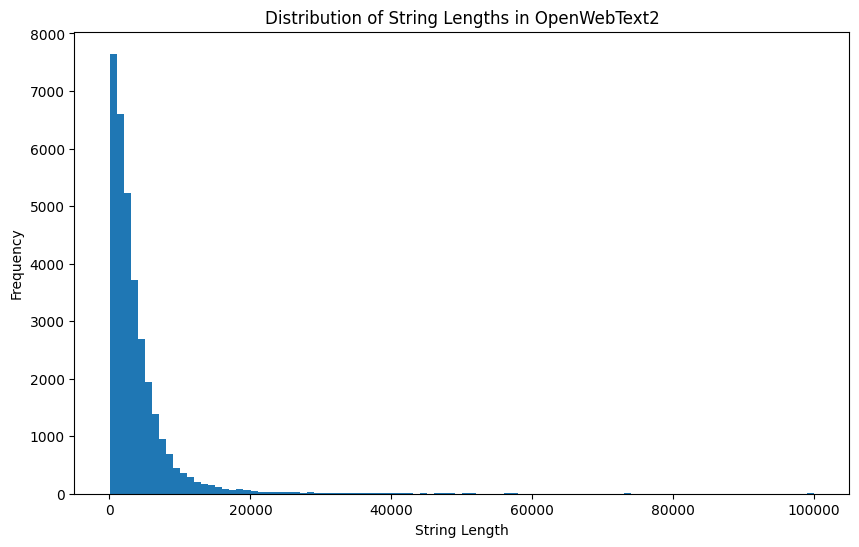

In [8]:
# prompt: graph the lengths of the strings for the `OpenWebText2` array in `piles`

import matplotlib.pyplot as plt

lengths = [len(s) for s in piles["OpenWebText2"]]

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=100)
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.title("Distribution of String Lengths in OpenWebText2")
plt.show()


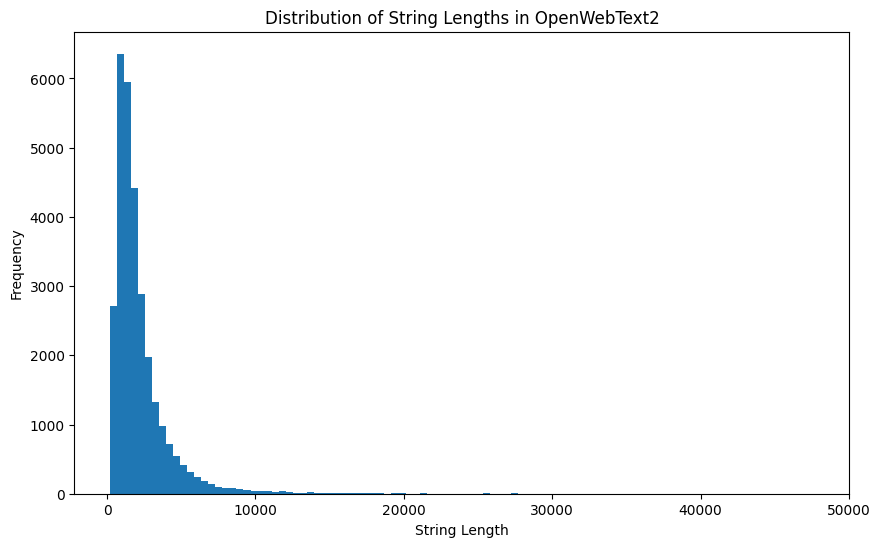

In [9]:
lengths = [len(s) for s in piles["StackExchange"]]

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=100)
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.title("Distribution of String Lengths in OpenWebText2")
plt.show()

In [10]:
# prompt: list the sizes of each array in `piles`

for pile in piles:
  print(pile, len(piles[pile]))


OpenWebText2 33400
PubMed Abstracts 29871
Github 18337
StackExchange 29950
Enron Emails 947
FreeLaw 5094
USPTO Backgrounds 11387
Pile-CC 52792
Wikipedia (en) 17478
Books3 301
PubMed Central 5977
HackerNews 1619
Gutenberg (PG-19) 60
DM Mathematics 2007
NIH ExPorter 1825
ArXiv 2434
BookCorpus2 26
OpenSubtitles 621
YoutubeSubtitles 326
Ubuntu IRC 21
EuroParl 133
PhilPapers 64


In [11]:
# prompt: print the first 100 characters of each string in piles["PhilPapers"]

# keys: DM Mathematics, Pile-CC, Enron Emails, StackExchange, OpenWebText2, Github?

for s in piles["PubMed Abstracts"][:10]:
  print(s[:100], '\n')


Effect of sleep quality on memory, executive function, and language performance in patients with ref 

Fluorescent labeling of both GABAergic and glycinergic neurons in vesicular GABA transporter (VGAT)- 

Carotid endarterectomy: operative risks, recurrent stenosis, and long-term stroke rates in a modern  

Regulation of the anaerobic metabolism in Bacillus subtilis.
The Gram-positive soil bacterium Bacill 

Early and long-term outcomes after manual and remote magnetic navigation-guided catheter ablation fo 

Effect of Cardiac Rehabilitation on Sexual Satisfaction Among Patients After Coronary Artery Bypass  

[Chronic intestinal pseudo-obstruction. Clinical symptomatology and course].
Chronic intestinal pseu 

Posterior only versus combined anterior and posterior approaches to lumbar scoliosis in adults: a ra 

The pathophysiology of neurofibromatosis. I. Resistance in vitro to 3-nitrotyrosine as an expression 

[A sociomedical geriatric assessment in the emergency units: an alternati

In [12]:
%%time
for text in piles["Pile-CC"][:10]:
  score = pipe(text[:200], candidate_labels=["question & answer"], multi_label=True
               )["scores"][0]
  print(score)

0.005718490574508905


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


0.574669361114502
0.0022999057546257973
0.03634590283036232
0.6968874335289001
0.04393761605024338
0.6389277577400208
0.046391721814870834
0.2475363314151764
0.017452457919716835
CPU times: user 232 ms, sys: 3.51 ms, total: 236 ms
Wall time: 233 ms


In [13]:
print(piles["Pile-CC"][1], '\n', piles["Pile-CC"][4][:200], '\n', piles["Pile-CC"][6][:200])

Wednesday, May 24, 2017

Facebook redesigns Trending topics to make news easier to find

Facebook is introducing a couple of changes today that make it easier to spot trending topics and the coverage around them. First up, there’s a bit of a visual redesign. Previously, clicking on a trending topic would highlight a story from one publication, and you’d have to scroll down past a live video section to view related stories. Facebook is replacing that system with a simple carousel, which does a better job of showing you different coverage options. To be clear, the change doesn’t affect how stories are sourced, according to Facebook. It’s still the same algorithm picking out some of the most… 
 Online Marketing Ideas for Businesses and Private Practitioners

For some reason, a lot of people have that kind of fear of dentists as demonstrated by many adults. There is that so called dental phob 
 Abstract

SWFP ensures the secure broadcasting of web feeds ’ content over a local network or th

In [14]:
pipe(piles["NIH ExPorter"][:10], candidate_labels=["question & answer"], multi_label=True)

[{'sequence': 'The epithelial-mesenchymal transition (EMT) is characterized by the loss of cell-cell adhesion and cell polarity in epithelial cells and the acquisition of motile and invasive properties. While essential for development, the EMT is one mechanism by which tumors can acquire the capability to undergo tissue invasion and metastasis. It is therefore important to identify novel therapies that can inhibit the EMT, but few assays for EMT inhibitors in high throughput screens (HTS) have developed. A change in fibroblast growth factor receptor 2 (FGFR2) splicing occurs during the EMT and using an innovative luciferase-based splicing reporter assay we previously carried out a genome-wide high throughput cDNA expression screen for regulators of this splicing switch. This screen identified the epithelial cell type specific splicing regulators ESRP1 and ESRP2 demonstrating the feasibility of cell-based splicing assays in high throughput, array-based screens. An extensive set of ESRP-

In [15]:
%%time
# prompt: batch process all of the text in `piles` through `pipe`

scores = []
for pile in ["DM Mathematics", "Enron Emails", "StackExchange", "Github", "OpenWebText2", "Pile-CC"]:
  print("doing ", pile)
  cp = piles[pile]
  for i in range(len(cp)):
    cp[i] = cp[i][:100]
  ress = pipe(cp, candidate_labels=["question & answer"], multi_label=True)
  for res in ress:
    scores.append((res["scores"][0], res["sequence"], pile))

# Sort the scores in descending order
scores.sort(key=lambda x: x[0], reverse=True)

# Print sample of the top 10 highest-scoring texts
for score, text, pile in scores[:10]:
  print(f"Score: {score:.2f}\nPile: {pile}\nText:{text[:1000]}\n==========================================")


doing  DM Mathematics
doing  Enron Emails
doing  StackExchange
doing  Github
doing  OpenWebText2
doing  Pile-CC
Score: 1.00
Pile: StackExchange
Text:Q:

Determine the composition of the functions $f(x)=4x+3$ and $g(x)=-5x^2+1$

Answer: 
\begin{align
Score: 1.00
Pile: StackExchange
Text:Q:

Would Adaptive Optics be Useful in Radio Astronomy?

This Question and Answer got me thinking. I
Score: 1.00
Pile: Pile-CC
Text:What is the Armenian Orthodox Church?

Question: "What is the Armenian Orthodox Church?"

Answer:
Th
Score: 1.00
Pile: Pile-CC
Text:Israeli psy trance brothers Eyal & Oren give us a brief lowdown and answer a few questions about the
Score: 1.00
Pile: StackExchange
Text:Q:

Какой правильный синтаксис для sass перечислений?

Я хочу написать след. массив урлов:
.Header_t
Score: 1.00
Pile: OpenWebText2
Text:From my comment on this question/answer Why wasn't Superman naked when he was lifting Luthor's artif
Score: 1.00
Pile: StackExchange
Text:Q:

Pi-calculating program

I saw th

In [16]:
len(scores)

137433

In [17]:
scores.sort(key=lambda x: x[0], reverse=True)

for score, text, pile in scores[:10]:
  if pile == "DM Mathematics":
    continue
  print(f"Score: {score:.2f}\nPile: {pile}\nText:{text[:1000]}\n==========================================")

Score: 1.00
Pile: StackExchange
Text:Q:

Determine the composition of the functions $f(x)=4x+3$ and $g(x)=-5x^2+1$

Answer: 
\begin{align
Score: 1.00
Pile: StackExchange
Text:Q:

Would Adaptive Optics be Useful in Radio Astronomy?

This Question and Answer got me thinking. I
Score: 1.00
Pile: Pile-CC
Text:What is the Armenian Orthodox Church?

Question: "What is the Armenian Orthodox Church?"

Answer:
Th
Score: 1.00
Pile: Pile-CC
Text:Israeli psy trance brothers Eyal & Oren give us a brief lowdown and answer a few questions about the
Score: 1.00
Pile: StackExchange
Text:Q:

Какой правильный синтаксис для sass перечислений?

Я хочу написать след. массив урлов:
.Header_t
Score: 1.00
Pile: OpenWebText2
Text:From my comment on this question/answer Why wasn't Superman naked when he was lifting Luthor's artif
Score: 1.00
Pile: StackExchange
Text:Q:

Pi-calculating program

I saw this question and answer about calculating pi on Stack Overflow, a
Score: 0.99
Pile: StackExchange
Text:Q:

Что та